In [1]:
import pandas as pd 
import numpy as np 
from numpy.random import randn
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Titanic_df = pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\STUDY\train.csv',sep=',')

In [3]:
Titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


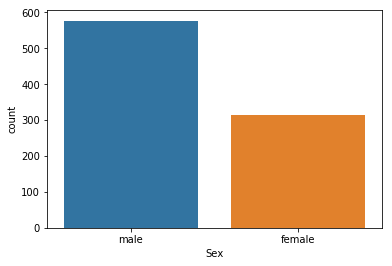

In [5]:
sns.countplot('Sex',data= Titanic_df)

The histogram shows that about twice male died than female.

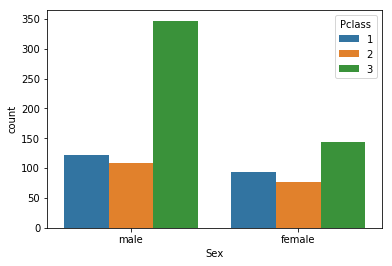

In [6]:
sns.countplot('Sex',data=Titanic_df, hue='Pclass')

when segregated in their ticket classes; Appears like more than twice male and Female died who were in 3rd class seats compared to first class and second class. What is surprising is that more first class travelers died that second class. 

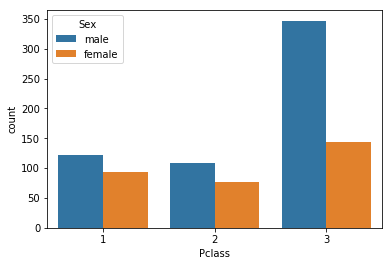

In [7]:
sns.countplot('Pclass',data=Titanic_df, hue='Sex')

To further look into the classes and how it correlation with death of people travelling in the Titanic; Again proving that in the whole disaster female deaths were less, could be because of female and kids before male policy followed in emergencies.

In [8]:
def male_female_child(passenger):
    Age, Sex = passenger
    if Age < 15:
        return 'child'
    else:
        return Sex

In [9]:
Titanic_df['person'] = Titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

Since the data didnt have child classification I broke age below 15 to be a child.

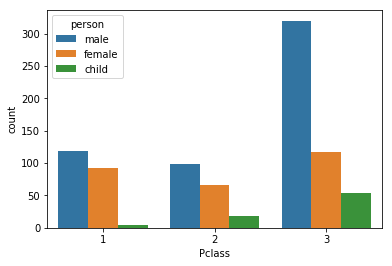

In [10]:
sns.countplot('Pclass',data=Titanic_df, hue='person')

Child death were the lowest in the incident.

In [11]:
def Status(Report):
    Rat = Report
    if Rat == 1:
        return "Surv"
    else:
        return "Death"

In [12]:
Titanic_df['Status'] = Titanic_df['Survived'].apply(Status)
Titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Death
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Surv
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Surv
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Surv
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Death
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Death
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Death
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,Death
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,Surv
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,Surv


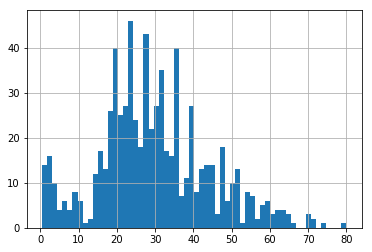

In [13]:
Titanic_df['Age'].hist(bins=60)

To further analyze if age of a person had any impact on their surviving;It is seen that the most death were in the age 20-40.

In [14]:
Titanic_df['Age'].mean()

29.69911764705882

In [15]:
Titanic_df['person'].value_counts()

male      538
female    275
child      78
Name: person, dtype: int64

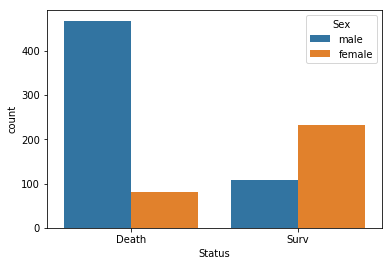

In [16]:
sns.countplot('Status',data=Titanic_df,hue='Sex')

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


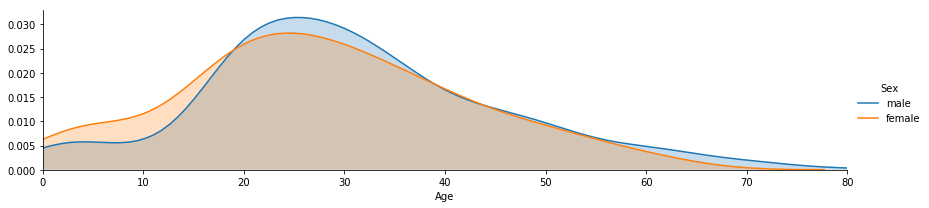

In [17]:
fig = sns.FacetGrid(Titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = Titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

The above graph shows the spread of age among both the genders, which is quite similar.

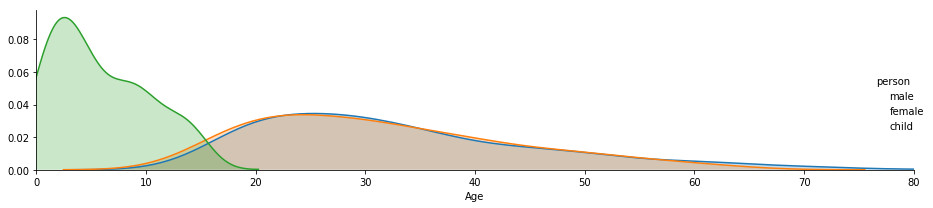

In [18]:
# IMPORT CONCEPT
fig = sns.FacetGrid(Titanic_df,hue='person',aspect=4)
oldest = Titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
fig.map(sns.kdeplot,'Age',shade=True)


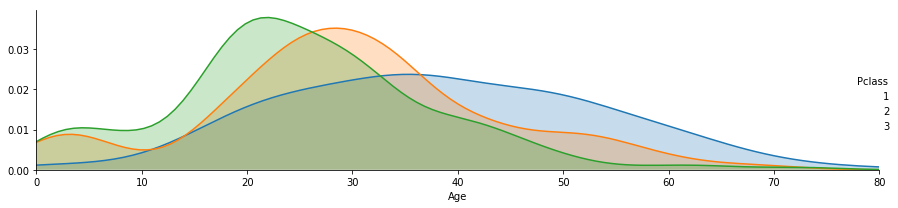

In [19]:
fig = sns.FacetGrid(Titanic_df,hue='Pclass',aspect=4)
oldest = Titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
fig.map(sns.kdeplot,'Age',shade=True)

In [20]:
deck = Titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

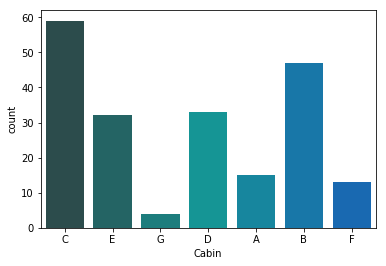

In [22]:
levels = []

for a in deck:
    if a[0] != 'T':
        levels.append(a[0])
    else:
        continue

cabin_df = DataFrame(levels)

cabin_df.columns =['Cabin']

sns.countplot('Cabin',data= cabin_df,palette='winter_d')

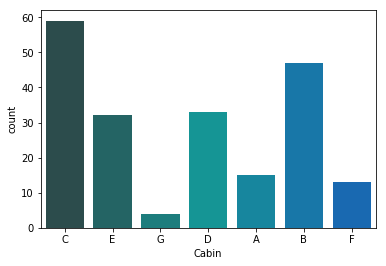

In [23]:
# one more way to remove T Cabin would be
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data= cabin_df,palette='winter_d')

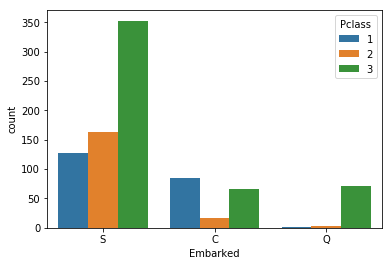

In [24]:
sns.countplot(x='Embarked',data=Titanic_df, hue='Pclass')

In [25]:
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Death
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Surv
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Surv
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Surv
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Death


In [27]:
def Single(stat):
    SibSp, Parch = stat
    if SibSp == 0 and Parch == 0:
        return 'Alone'
    else:
        return 'Not Alone'

In [28]:
Titanic_df['Relatives'] = Titanic_df[['SibSp','Parch']].apply(Single,axis= 1)

In [29]:
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Status,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Death,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Surv,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Surv,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Surv,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Death,Alone


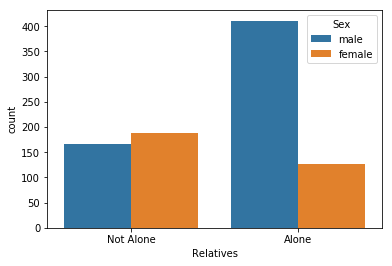

In [30]:
sns.countplot('Relatives',data=Titanic_df,hue='Sex')

The analysis shows that more female died who were not travellling alone in the ship.

In [31]:
#can also be done this way
Titanic_df['survivor'] = Titanic_df.Survived.map({0:'no',1:'yes'})

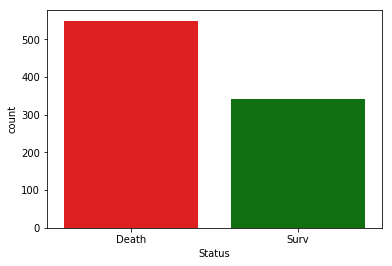

In [33]:
sns.countplot('Status',data= Titanic_df,palette={'Death':'Red',"Surv":'Green'})

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


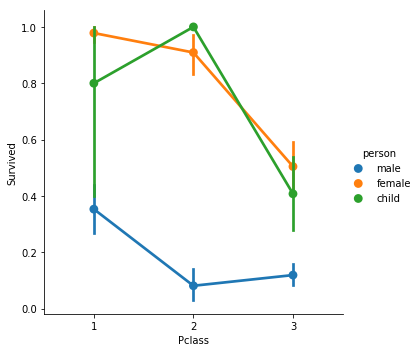

In [34]:
sns.factorplot(y='Survived',x='Pclass', data= Titanic_df,hue='person')

The above plot shows survival with the clas they were travelling in and their gender. women and child in class 2 had the most chances of surviving.

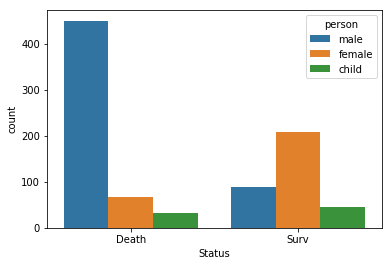

In [35]:
sns.countplot('Status',data=Titanic_df, hue='person')

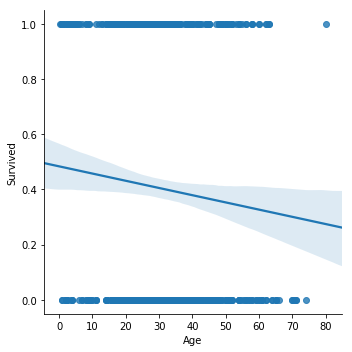

In [36]:
sns.lmplot('Age','Survived',data=Titanic_df)

Above plot shows how survival rate were higg for elderly and child.

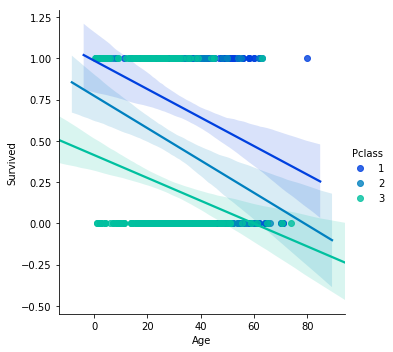

In [37]:
sns.lmplot('Age','Survived',hue='Pclass',data=Titanic_df, palette='winter')

Visual of high survival rate of class 1 and child and old people.

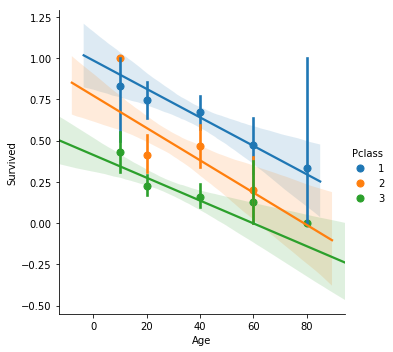

In [38]:
generation =[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass', data=Titanic_df, x_bins=generation)

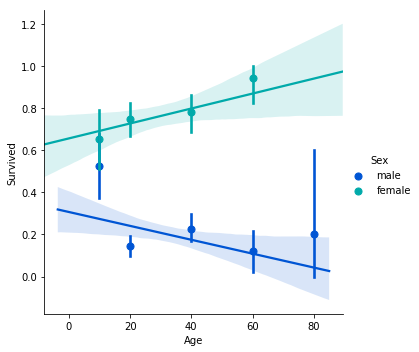

In [39]:
sns.lmplot('Age','Survived',hue='Sex',palette='winter',data=Titanic_df, x_bins=gener`ation)

It is strange that even child and elderly male had more deaths than female child and elderly.

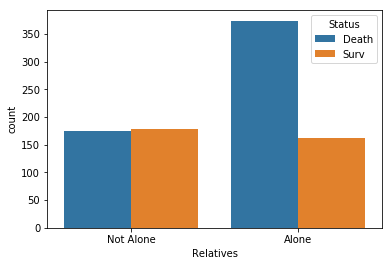

In [41]:
sns.countplot('Relatives',data=Titanic_df,hue='Status')

shows death  and survival of people who were either alone or with their relatives.